In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Mengecek missing value di setiap kolom sebelum preprocessing dan menampilkannya dalam bentuk tabel

print("Missing value sebelum dilakukan cleaning data:")
df.isnull().sum()


Missing value sebelum dilakukan cleaning data:


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:

df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [7]:
nan_data = df[df.isna().any(axis=1)]
nan_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
87,88,53,Female,Cleveland,non-anginal,128.0,216.0,False,lv hypertrophy,115.0,False,0.0,upsloping,0.0,NaN,0
166,167,52,Male,Cleveland,non-anginal,138.0,223.0,False,normal,169.0,False,0.0,upsloping,NaN,normal,0
192,193,43,Male,Cleveland,asymptomatic,132.0,247.0,True,lv hypertrophy,143.0,True,0.1,flat,NaN,reversable defect,1
266,267,52,Male,Cleveland,asymptomatic,128.0,204.0,True,normal,156.0,True,1.0,flat,0.0,NaN,2
287,288,58,Male,Cleveland,atypical angina,125.0,220.0,False,normal,144.0,False,0.4,flat,NaN,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
df


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df = df.dropna()
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,300,68,Male,Cleveland,asymptomatic,144.0,193.0,True,normal,141.0,False,3.4,flat,2.0,reversable defect,2
300,301,57,Male,Cleveland,asymptomatic,130.0,131.0,False,normal,115.0,True,1.2,flat,1.0,reversable defect,3
301,302,57,Female,Cleveland,atypical angina,130.0,236.0,False,lv hypertrophy,174.0,False,0.0,flat,1.0,normal,1
508,509,47,Male,Hungary,asymptomatic,150.0,226.0,False,normal,98.0,True,1.5,flat,0.0,reversable defect,1


In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
299    False
300    False
301    False
508    False
748    False
Length: 299, dtype: bool

In [12]:
df_clean=df.drop_duplicates()
print(df_clean)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
299  300   68    Male      Cleveland     asymptomatic     144.0  193.0   True   
300  301   57    Male      Cleveland     asymptomatic     130.0  131.0  False   
301  302   57  Female      Cleveland  atypical angina     130.0  236.0  False   
508  509   47    Male        Hungary     asymptomatic     150.0  226.0  False   
748  749   56    Male  VA Long Beach     asymptomatic     120.0  100.0  False   

            restecg  thalch

In [13]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Mendeteksi outliers pada kolom 'trestbps', 'chol', 'thalch', dan 'oldpeak'
outliers_trestbps = detect_outliers_iqr(df, 'trestbps')
outliers_chol = detect_outliers_iqr(df, 'chol')
outliers_thalch = detect_outliers_iqr(df, 'thalch')
outliers_oldpeak = detect_outliers_iqr(df, 'oldpeak')

# Menampilkan outliers
outliers_trestbps, outliers_chol, outliers_thalch, outliers_oldpeak


(      id  age     sex    dataset               cp  trestbps   chol    fbs  \
 14    15   52    Male  Cleveland      non-anginal     172.0  199.0   True   
 83    84   68    Male  Cleveland      non-anginal     180.0  274.0   True   
 126  127   56  Female  Cleveland     asymptomatic     200.0  288.0   True   
 172  173   59  Female  Cleveland     asymptomatic     174.0  249.0  False   
 183  184   59    Male  Cleveland   typical angina     178.0  270.0  False   
 188  189   54    Male  Cleveland  atypical angina     192.0  283.0  False   
 201  202   64  Female  Cleveland     asymptomatic     180.0  325.0  False   
 213  214   66  Female  Cleveland     asymptomatic     178.0  228.0   True   
 231  232   55  Female  Cleveland     asymptomatic     180.0  327.0  False   
 
               restecg  thalch  exang  oldpeak        slope   ca  \
 14             normal   162.0  False      0.5    upsloping  0.0   
 83     lv hypertrophy   150.0   True      1.6         flat  0.0   
 126    lv hyp

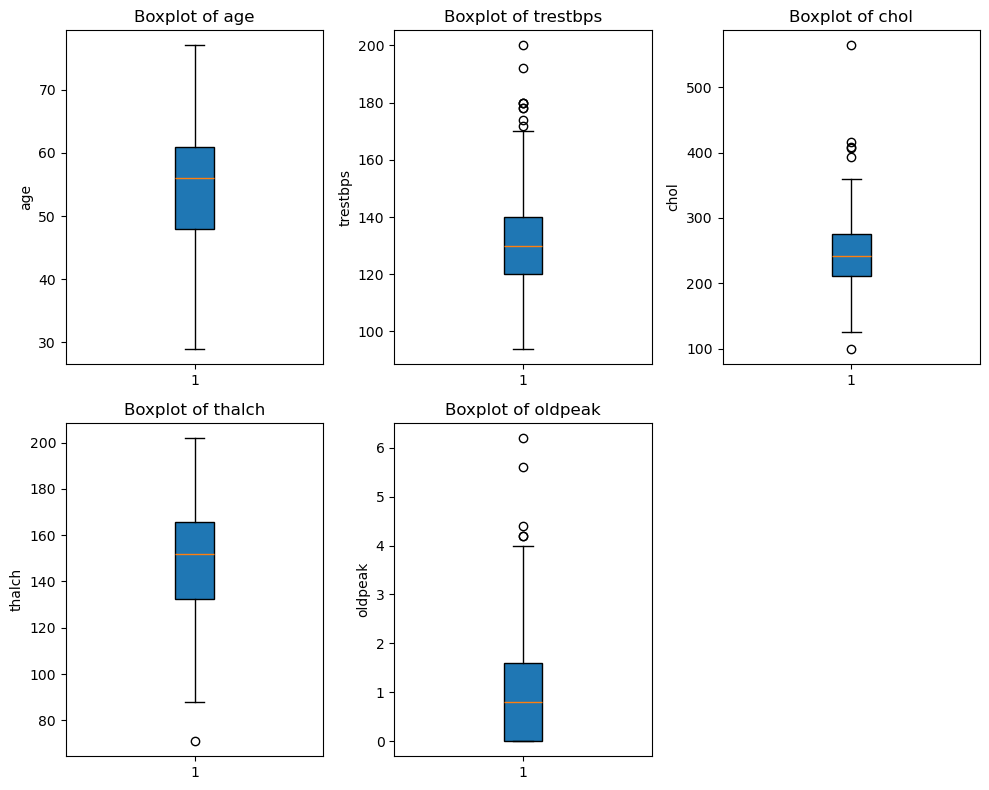

In [14]:
# Membuat box plot untuk beberapa kolom numerik
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

plt.figure(figsize=(10, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column].dropna(), patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [15]:
# Contoh menghapus outliers berdasarkan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned


In [16]:
# Menghapus outliers dari beberapa kolom
for column in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
    df = remove_outliers_iqr(df, column)


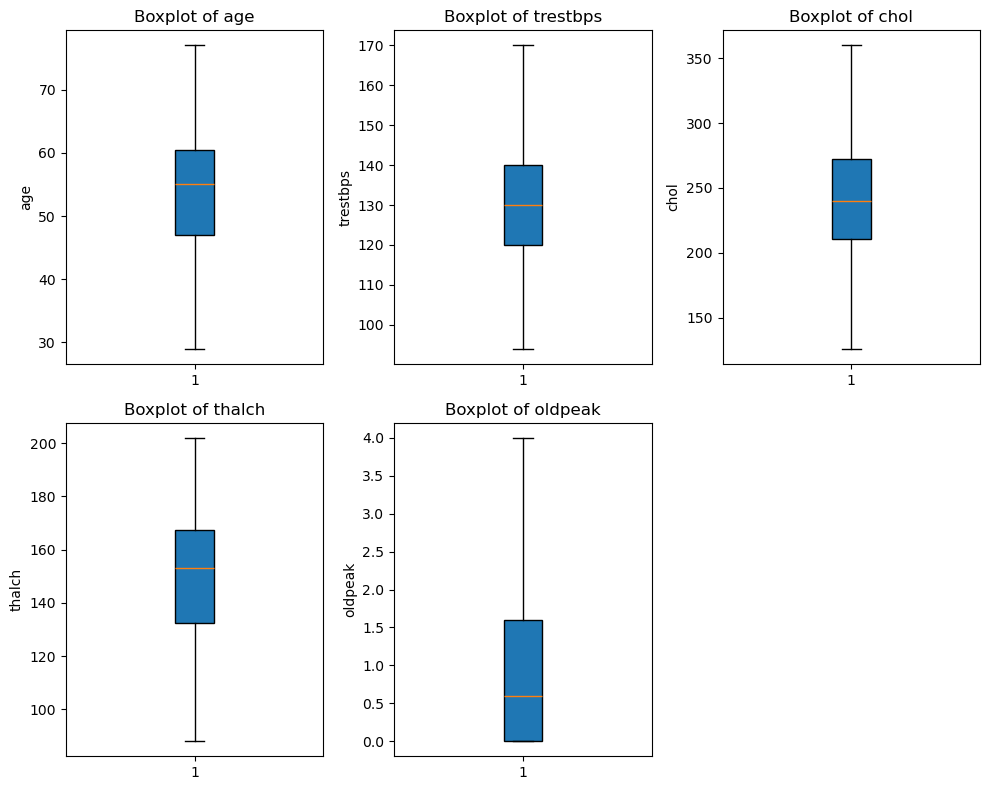

In [17]:
# Membuat box plot dari data yang sudah dihapus outliers-nya
plt.figure(figsize=(10, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column].dropna(), patch_artist=True)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [21]:
# Mengecek apakah masih ada outliers di dataset yang sudah dimodifikasi
for column in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
    outliers = detect_outliers_iqr(df, column)  # Pastikan menggunakan dataset yang sudah dimodifikasi
    if not outliers.empty:
        print(f"Masih ada outliers di kolom {column}")
    else:
        print(f"Tidak ada outliers di kolom {column}")



Tidak ada outliers di kolom age
Tidak ada outliers di kolom trestbps
Tidak ada outliers di kolom chol
Tidak ada outliers di kolom thalch
Tidak ada outliers di kolom oldpeak
